In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins') # Load the Palmer Penguins demo dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


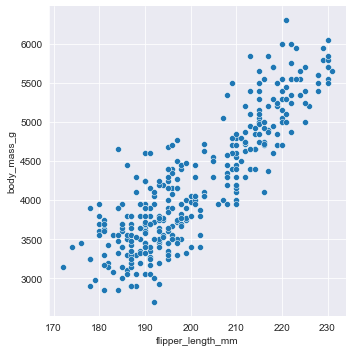

In [3]:
sns.relplot(data=penguins,  x='flipper_length_mm', y='body_mass_g')

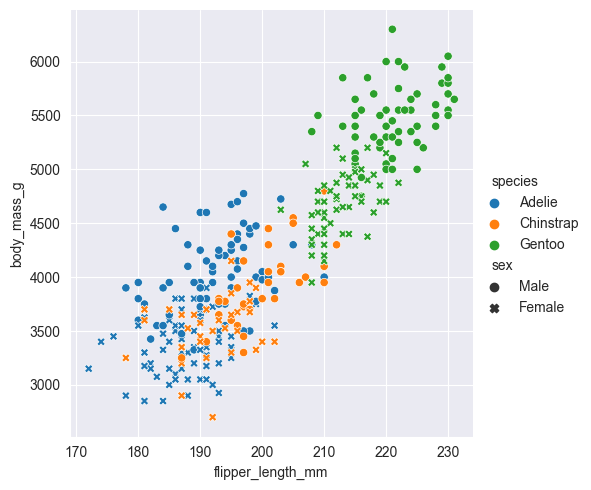

In [4]:
# color and symbol
sns.relplot(data=penguins,
            x='flipper_length_mm', y='body_mass_g',
            hue='species', style='sex')

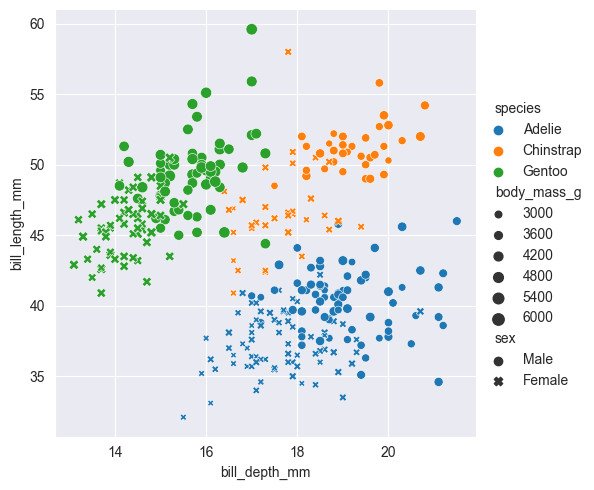

In [5]:
# color, symbol and size
sns.relplot(data=penguins,
            x='bill_depth_mm', y='bill_length_mm',
            size='body_mass_g',
            hue='species', style='sex')

In [6]:
male_chinstrap = penguins[(penguins['species'] == 'Chinstrap') & (penguins['sex'] == 'Male')]
male_chinstrap.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
159,Chinstrap,Dream,51.3,18.2,197.0,3750.0,Male
161,Chinstrap,Dream,51.3,19.9,198.0,3700.0,Male


In [7]:
# for simplification we calculate average body_mass_g per flipper_length_mm
male_chinstrap = male_chinstrap.groupby('flipper_length_mm')['body_mass_g'].mean().reset_index()
male_chinstrap.head(10)

,flipper_length_mm,body_mass_g
0,187.0,3250.000000
1,191.0,3400.000000
2,193.0,3741.666667
3,194.0,3775.000000
4,195.0,4000.000000
5,196.0,3725.000000
6,197.0,3675.000000
7,198.0,3700.000000
8,200.0,3800.000000
9,201.0,4160.000000


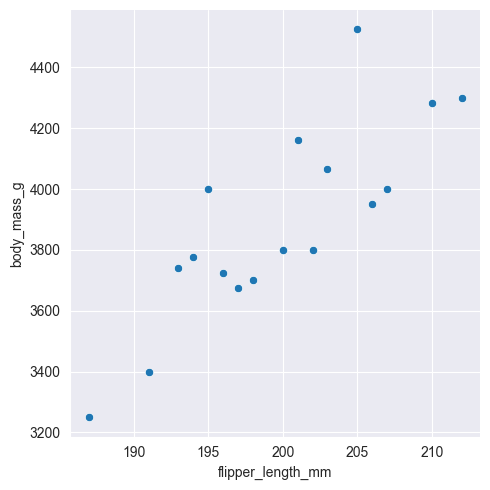

In [8]:
sns.relplot(data=male_chinstrap, x='flipper_length_mm', y='body_mass_g')

### Method of least squares

Parameters $\beta_0$ (intercept with the Y axis) and $\beta_1$ (slope) are calculated as follows:

$\beta_1 = \displaystyle \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n}(x_i - \overline{x})^2}$

and

$\beta_0 = \overline{y} - \beta_1 \overline{x}$

In [9]:
#calculate slope and intercept
mx = male_chinstrap.flipper_length_mm.mean()
my = male_chinstrap.body_mass_g.mean()
xx = male_chinstrap.flipper_length_mm - mx
yy = male_chinstrap.body_mass_g - my
beta1 = sum(xx * yy) / sum(xx ** 2)
beta0 = my - beta1 * mx

# Regression line equation
print(f"ŷ = {beta0:.2f} + {beta1:.2f} x")

ŷ = -3868.33 + 38.83 x


In [10]:
import math
# set the minimum and maximum value of the x- and y-axis
xmin = math.floor(male_chinstrap['flipper_length_mm'].min() / 10) * 10
xmax = math.ceil(male_chinstrap['flipper_length_mm'].max() / 10) * 10

ymin = math.floor(male_chinstrap['body_mass_g'].min() / 10) * 10
ymax = math.ceil(male_chinstrap['body_mass_g'].max() / 10) * 10

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

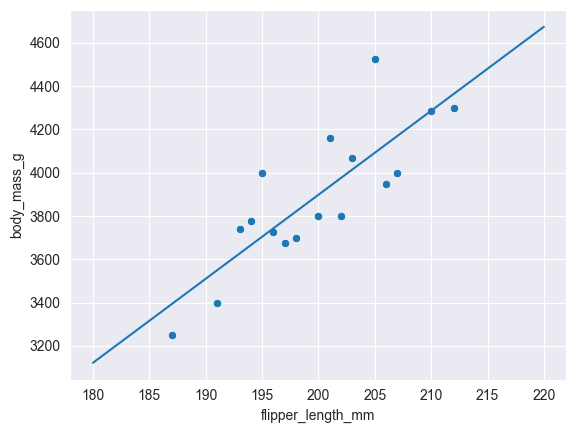

In [11]:
x_values = [xmin, xmax]
y_values = [beta1 * x_values[0] + beta0, beta1 * x_values[1] + beta0]

sns.lineplot(x=x_values, y=y_values)
sns.scatterplot(x=male_chinstrap.flipper_length_mm, y=male_chinstrap.body_mass_g)

directly plot a data set with regression line

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

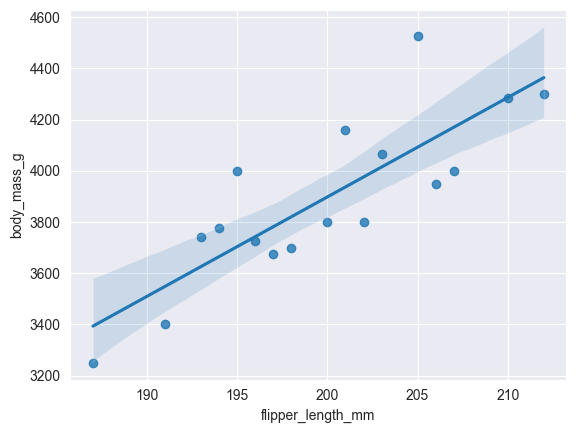

In [12]:
sns.regplot(x=male_chinstrap.flipper_length_mm, y=male_chinstrap.body_mass_g)

scikit-learn: calculate linear regression model from a set of observations

In [15]:
from sklearn.linear_model import LinearRegression

# convert X-values to 2D array
male_chinstrap_x = male_chinstrap.flipper_length_mm.values.reshape(-1,1)
male_chinstrap_y = male_chinstrap.body_mass_g

weight_model = LinearRegression().fit(male_chinstrap_x, male_chinstrap_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -3868.33 + 38.83 x


**Covariance** is a measure that indicates whether a (linear) relationship
between two variables is increasing or decreasing.

Cov > 0: increasing
Cov ≈ 0: no relationship
Cov < 0: decreasing

!!!population $1/n$, but sample $1/(n-1)$

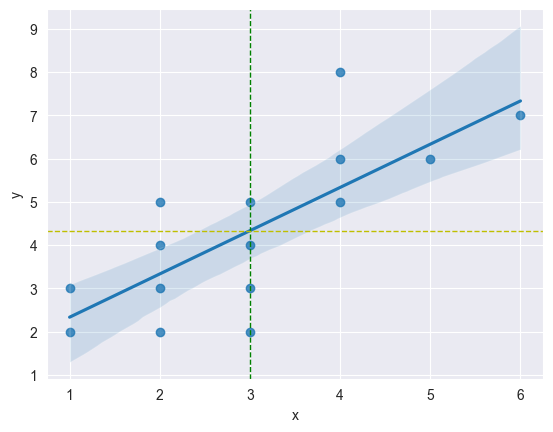

In [16]:
families = pd.DataFrame(data={
    'x': [1,1,2,2,2,2,3,3,3,3,4,4,4,5,6],
    'y': [2,3,2,3,4,5,2,3,4,5,5,6,8,6,7]
})

sns.regplot(x=families.x, y=families.y) # data set with its regression line
plt.axvline(families.x.mean(), lw=1, color='g', linestyle='dashed')  # Plot mean of x
plt.axhline(families.y.mean(), lw=1, color='y', linestyle='dashed')  # Plot mean of y

In [17]:
#!!! 1/(n-1)
mx = families.x.mean()
my = families.y.mean()

covar = sum((families.x - mx) * (families.y - my)) / (len(families.x) - 1)
print(f"Cov(x,y) = {covar}")

Cov(x,y) = 2.0


In [19]:
#!!! 1/(n-1) => ddof=1
np.cov(families.x, families.y, ddof=1)[0][1]

2.0

### Pearson's product-moment correlation coefficient
$R$ is a measure for
the strength of a linear correlation between $x$ and $y$
Always between −1 and +1. The closer it is to either of these two extremes, the closer the points in a scatterplot are to a straight line, either in the negative or positive direction.

In [20]:
# Correlation calculated from covariance
R1 = covar / (families.x.std() * families.y.std())
print(f"R = {R1}")

R = 0.7533708035008838


In [21]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(families.x, families.y)[0][1]
print(f"R = {cor}")

R = 0.7533708035008838


### Coefficient of determination

The closer to 1, the more the variance is explained by the regression line, and the stronger the linear relation between the variables.

In [22]:
cor ** 2

0.5675675675675673

In [23]:
# coef of determination = score from model
familiesx = families.x.values.reshape(-1,1)
familiesy = families.y

families_model = LinearRegression().fit(familiesx, familiesy)
families_model.score(familiesx, familiesy)

0.5675675675675678

### Interpretation of R and R²

Depending on the value of $|R|$ (or $R^2$), you can draw a conclusion about the strength of the linear relation between the two variables:

| $abs(R)$  |  $R^2$   | Explained variance |   Linear relation    |
| :-------: | :------: | :----------------: | :------------------: |
|   < .3    |   < .1   |       < 10%        |      very weak       |
|  .3 - .5  | .1 - .25 |     10% - 25%      |         weak         |
|  .5 - .7  | .25 - .5 |     25% - 50%      |       moderate       |
| .7 - .85  | .5 - .75 |     50% - 75%      |        strong        |
| .85 - .95 | .75 - .9 |     75% - 90%      |     very strong      |
|   > .95   |   > .9   |       > 90%        | exceptionally strong |

Instead, you should say it indicates an _increasing and strong linear relation_.

In [25]:
np.cov(male_chinstrap.flipper_length_mm, male_chinstrap.body_mass_g, ddof=1)[0][1]

1835.9681372549019

In [27]:
cor = np.corrcoef(male_chinstrap.flipper_length_mm, male_chinstrap.body_mass_g)[0][1]
print(f"R = {cor}")

R = 0.8268244668793293


In [28]:
cor ** 2

0.6836386990302872